In [2]:
import xml.etree.ElementTree as et
from xml.dom import minidom
import cv2 as cv
import re
import os
import matplotlib.pyplot as plt
import random
import numpy as np

DATASET_PATH = r'dataset/'

Check what we have in dataset:

In [4]:
print('What we have in dataset folder -- ', os.listdir('dataset/'))
print('Annotations has folders -- ', os.listdir('dataset/Annotations/'))
print('ImageSets has folders -- ', os.listdir('dataset/ImageSets/'))
print('ImageSets/Main has files -- ', os.listdir('dataset/ImageSets/Main/'))
print('Number of images -- ', len(os.listdir('dataset/JPEGImages/')))

with open('dataset/ImageSets/Main/train.txt', 'r') as fl:
    file = fl.readlines()
print('Number file names in train dataset -- ',len(file))

with open('dataset/ImageSets/Main/test.txt', 'r') as fl:
    file = fl.readlines()
print('Number file names in test dataset -- ', len(file))


What we have in dataset folder --  ['Annotations', 'ImageSets', 'JPEGImages']
Annotations has folders --  ['Horizontal Bounding Boxes', 'Oriented Bounding Boxes']
ImageSets has folders --  ['Main']
ImageSets/Main has files --  ['test.txt', 'train.txt']
Number of images --  3842
Number files name in train dataset --  1331
Number files name in test dataset --  2511


Make function to pretify xml files:

In [60]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = et.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml()

Shown an example what type of information in xml files of horizontal BB and oriented BB.

In [61]:
horizontal_files_list = os.listdir(DATASET_PATH+'/Annotations/Horizontal Bounding Boxes/')
horizon_random_file_path = DATASET_PATH+'Annotations/Horizontal Bounding Boxes/' + random.choice(horizontal_files_list)
horizontal_tree = et.parse(horizon_random_file_path)
horizon_root = horizontal_tree.getroot()

oriented_files_list = os.listdir(DATASET_PATH+'Annotations/Oriented Bounding Boxes/')
oriented_random_file_path = DATASET_PATH+'Annotations/Oriented Bounding Boxes/' + random.choice(oriented_files_list)
oriented_tree = et.parse(oriented_random_file_path)
orient_root = oriented_tree.getroot()

print(prettify(horizon_root))
print(prettify(orient_root))

<?xml version="1.0" ?>
<annotation>
	
	
	<folder>Unknown</folder>
	
	
	<filename>3441.jpg</filename>
	
	
	<path>Unknown</path>
	
	
	<source>
		
		
		<database>MAR20</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>800</width>
		
		
		<height>800</height>
		
		
		<depth>3</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>A17</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>1</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>468</xmin>
			
			
			<ymin>616</ymin>
			
			
			<xmax>654</xmax>
			
			
			<ymax>800</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>A12</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>405</xmin>
			
			
			<ymin>32</ymin>
			
			
			<xmax>531</xmax>
			
			
			<ymax>192</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>A12</name>
		
		
		<pose>Unspecified</po

Make function to get unique values from list:

In [4]:
uni_list = lambda array: list(set(array))

Create function to show values count in list:

In [84]:
def show_number_of_values(fig_size=(1,1),**kwargs):
    plots_number = len(kwargs)
    fig, ax = plt.subplots(plots_number, figsize=fig_size)
    fig.tight_layout()

    for index, (key, array) in enumerate(kwargs.items()):
        unique_value = uni_list(array)
        count_value = []
            
        for value in unique_value:
            count_value.append(array.count(value))

        if plots_number == 1:
            ax.bar(unique_value, count_value)
            ax.set_title(key)
            ax.plot()
        else:
            ax[index].bar(unique_value, count_value)
            ax[index].set_title(key)
            ax[index].plot()

    plt.show()

Shown an example of type of elements in file:

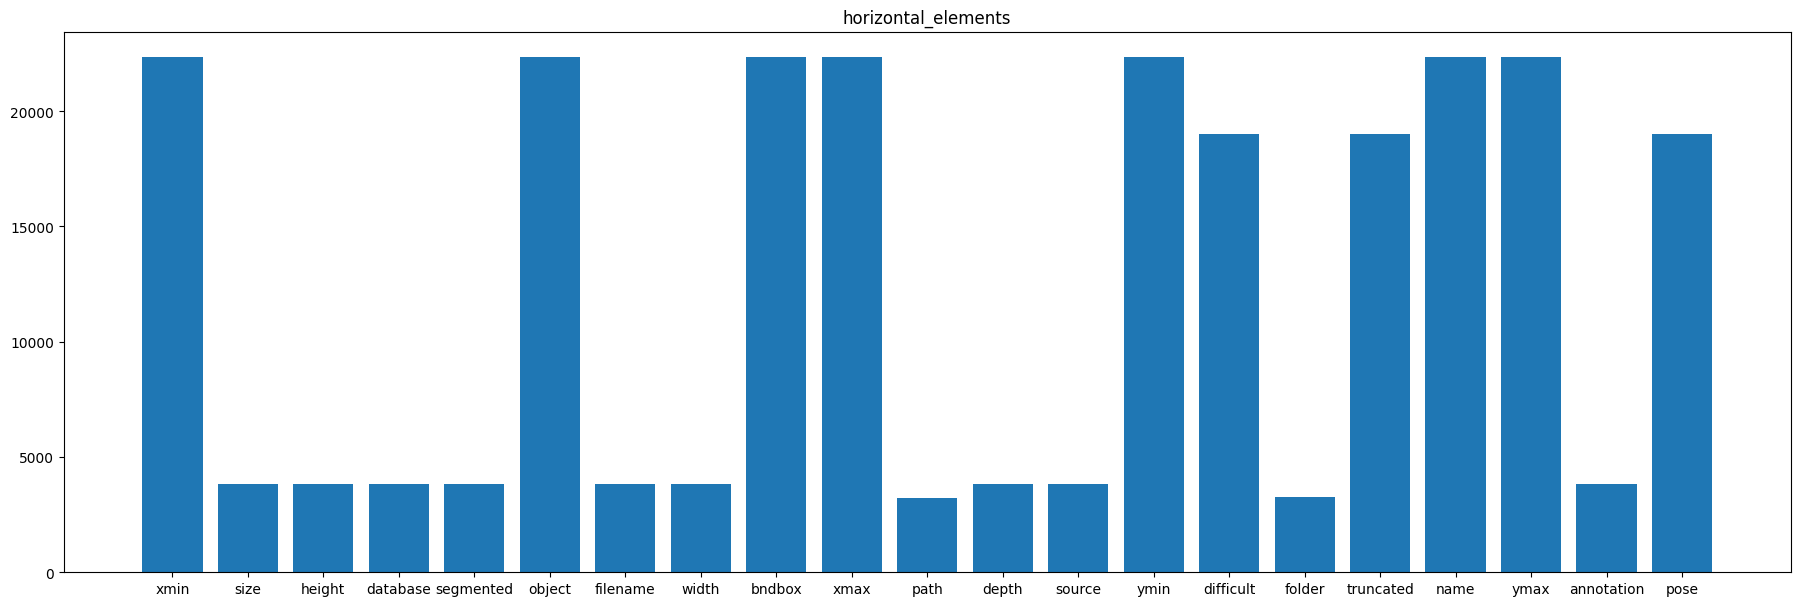

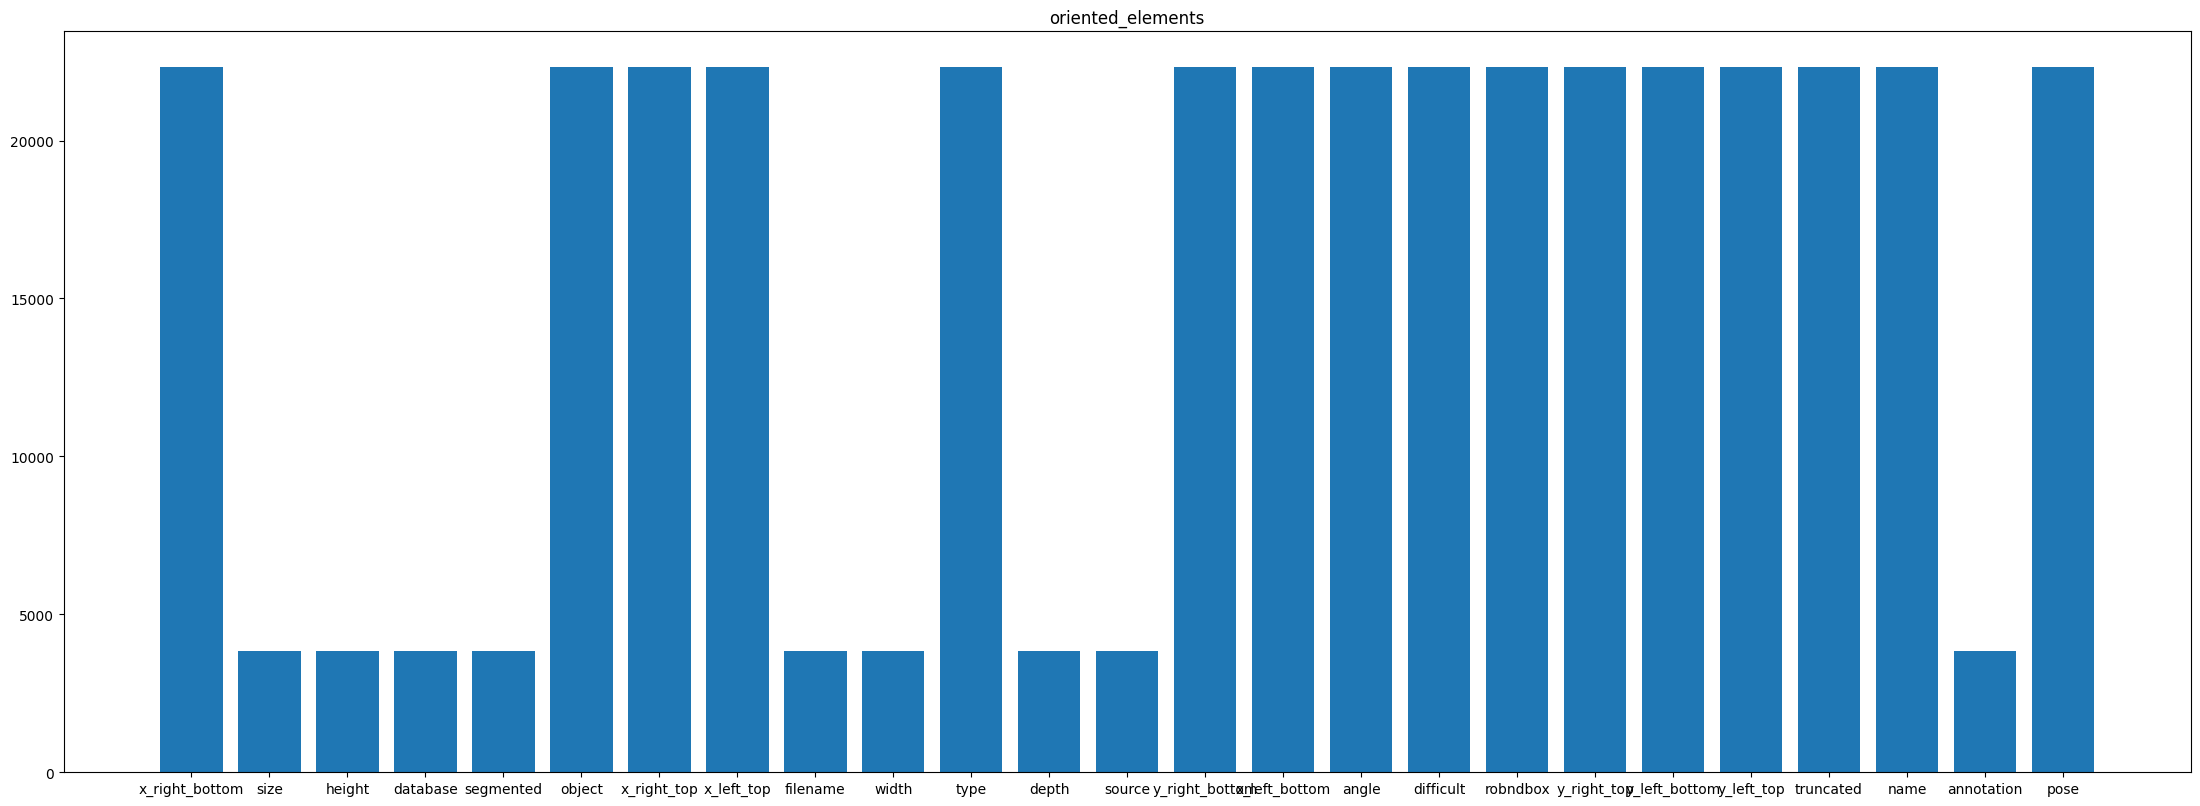

In [39]:
horizon_elemets_list = []

for horizon_file in horizontal_files_list:
    
    horizon_xml_tree = et.parse(DATASET_PATH+'Annotations/Horizontal Bounding Boxes/' + horizon_file)
    horizon_xml_root = horizon_xml_tree.getroot()
    elem = [elem.tag for elem in horizon_xml_root.iter()]
    horizon_elemets_list.extend(elem)

show_number_of_values((18,6),horizontal_elements=horizon_elemets_list)

orient_elemets_list = []

for orient_file in oriented_files_list:
    
    orient_xml_tree = et.parse(DATASET_PATH+'Annotations/Oriented Bounding Boxes/' + orient_file)
    orient_xml_root = orient_xml_tree.getroot()
    elem = [elem.tag for elem in orient_xml_root.iter()]
    orient_elemets_list.extend(elem)

show_number_of_values((22,8), oriented_elements=orient_elemets_list)

Some elements in xml files could be the same over dataset, for example "souce/dataset" or "segmented" and they could be useless, so we check if there are the same by showing it in graph:

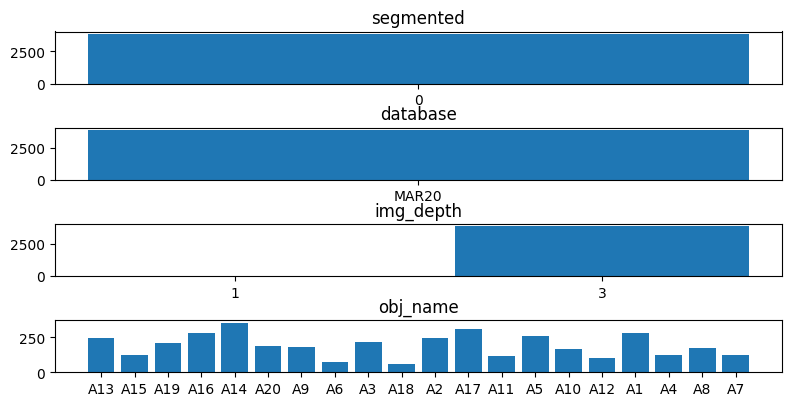

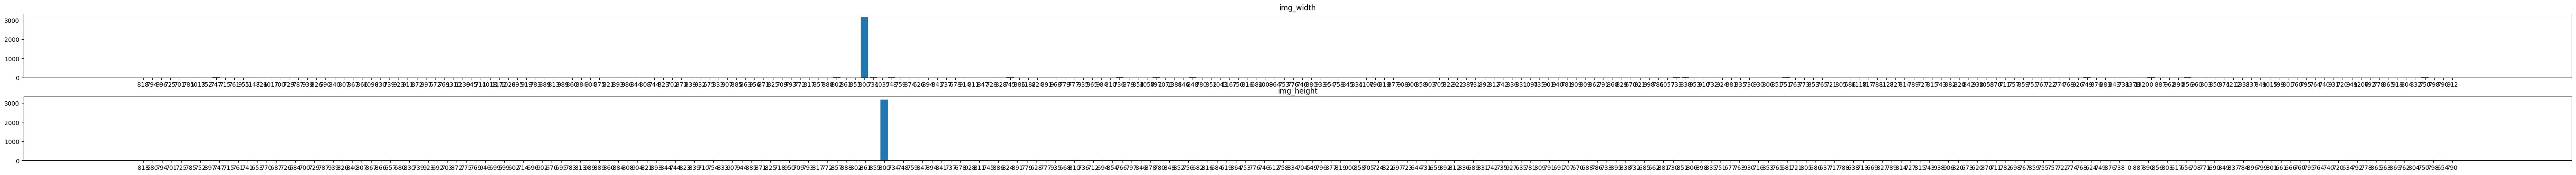

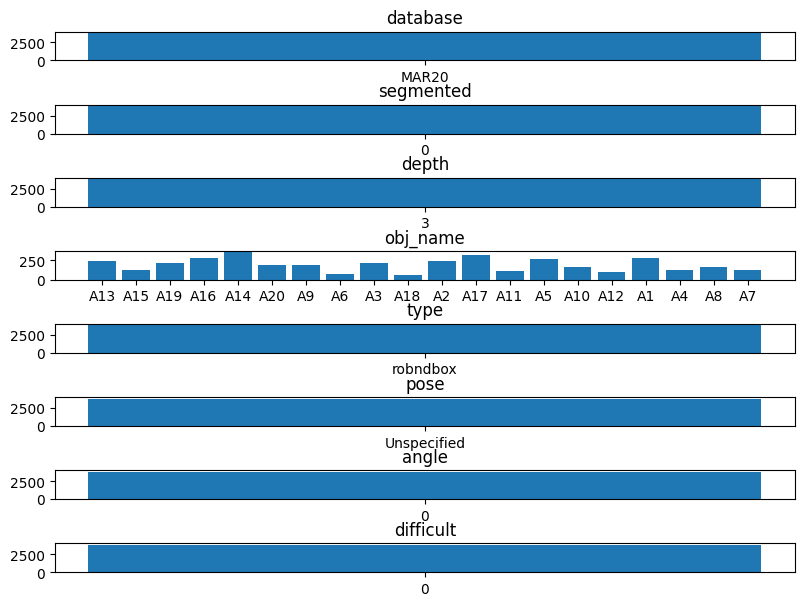

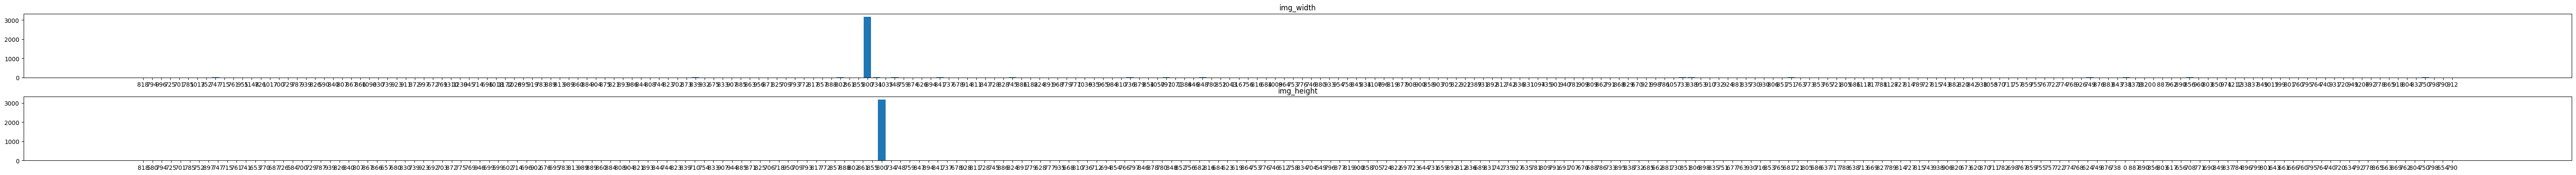

In [89]:
horizontal_database = []
horizontal_segmented = []
horizontal_img_width = []
horizontal_img_height = []
horizontal_depth = []
horizontal_obj_name = []

orient_database = []
orient_segmented = []
orient_img_width = []
orient_img_height = []
orient_img_depth = []
orient_obj_name = []
orient_type = []
orient_pose = []
orient_difficult = []
orient_angle = []

for horizon_file in horizontal_files_list:
    
    horizon_xml_tree = et.parse(DATASET_PATH+'Annotations/Horizontal Bounding Boxes/' + horizon_file)
    horizon_xml_root = horizon_xml_tree.getroot()
    horizontal_database.append(horizon_xml_root.find('source/database').text)
    horizontal_segmented.append(horizon_xml_root.find('segmented').text)
    horizontal_img_width.append(horizon_xml_root.find('size/width').text)
    horizontal_img_height.append(horizon_xml_root.find('size/height').text)
    horizontal_depth.append(horizon_xml_root.find('size/depth').text)
    horizontal_obj_name.append(horizon_xml_root.find('object/name').text)


show_number_of_values((8, 4),segmented=horizontal_segmented, database=horizontal_database,
                      img_depth=horizontal_depth, obj_name=horizontal_obj_name)
show_number_of_values((60, 4), img_width=horizontal_img_width, img_height=horizontal_img_height)

for orient_file in oriented_files_list:
    
    orient_xml_tree = et.parse(DATASET_PATH+'Annotations/Oriented Bounding Boxes/' + orient_file)
    orient_xml_root = orient_xml_tree.getroot()
    orient_database.append(orient_xml_root.find('source/database').text)
    orient_segmented.append(orient_xml_root.find('segmented').text)
    orient_img_width.append(orient_xml_root.find('size/width').text)
    orient_img_height.append(orient_xml_root.find('size/height').text)
    orient_img_depth.append(orient_xml_root.find('size/depth').text)
    orient_obj_name.append(orient_xml_root.find('object/name').text)
    orient_type.append(orient_xml_root.find('object/type').text)
    orient_pose.append(orient_xml_root.find('object/pose').text)
    orient_difficult.append(orient_xml_root.find('object/difficult').text)
    orient_angle.append(orient_xml_root.find('object/angle').text)

show_number_of_values((8,6),database=orient_database, segmented=orient_segmented, 
                      depth=orient_img_depth, obj_name=orient_obj_name,
                      type=orient_type, pose=orient_pose,
                      angle=orient_angle, difficult=orient_difficult)
show_number_of_values((60, 4), img_width=orient_img_width, img_height=orient_img_height)

Check if there are incorrect filenames in annotation:

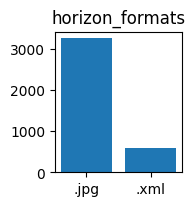

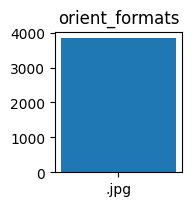

In [88]:
horizon_file_formats = []

for horizon_file in horizontal_files_list:
    horizon_xml_tree = et.parse(DATASET_PATH+'Annotations/Horizontal Bounding Boxes/' + horizon_file)
    horizon_xml_root = horizon_xml_tree.getroot()
    filename = horizon_xml_root.find('filename').text
    horizon_file_formats.append(re.search(r'\.[a-z]{3,4}$', filename).group(0))

show_number_of_values((2, 2), horizon_formats = horizon_file_formats)


orient_file_formats = []    

for orient_file in oriented_files_list:
    orient_xml_tree = et.parse(DATASET_PATH+'Annotations/Oriented Bounding Boxes/' + orient_file)
    orient_xml_root = orient_xml_tree.getroot()
    filename = orient_xml_root.find('filename').text
    orient_file_formats.append(re.search(r'\.[a-z]{3,4}$', filename).group(0))

show_number_of_values((2, 2), orient_formats = orient_file_formats)

Show how many objects are could in one images:

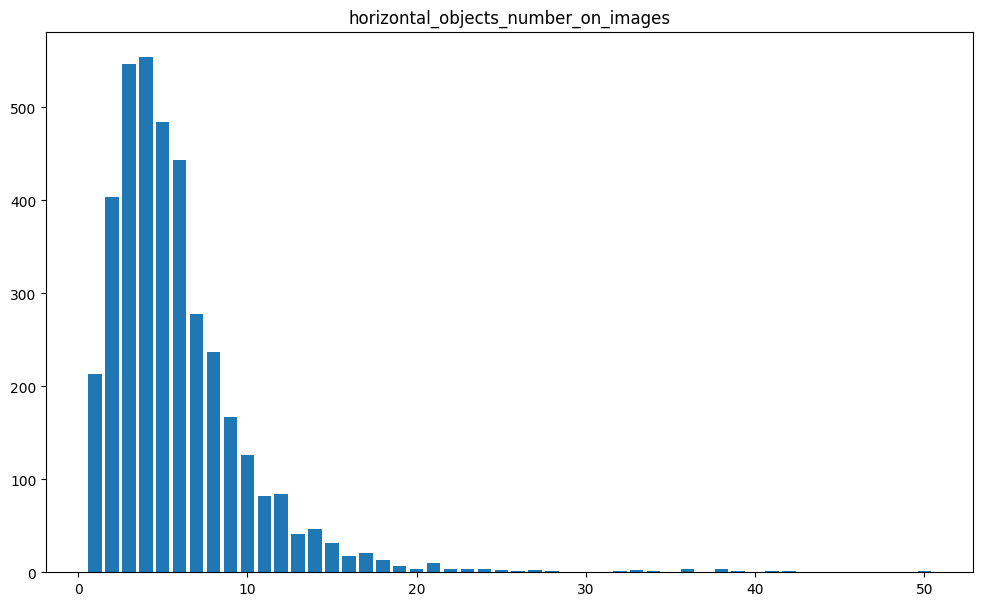

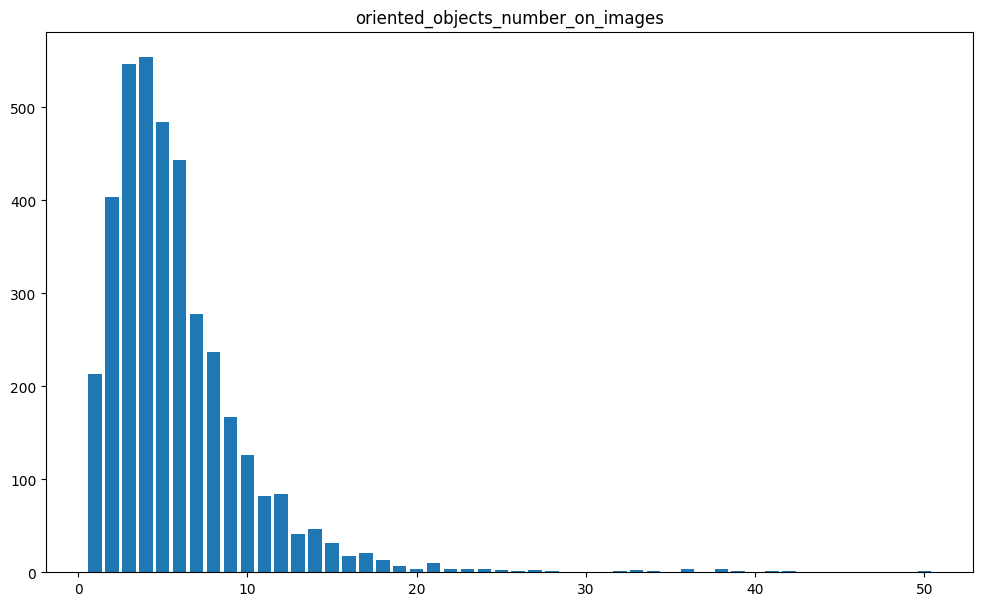

In [98]:
horizon_all_obj = []
for horizon_file in horizontal_files_list:
    horizon_xml_tree = et.parse(DATASET_PATH+'Annotations/Horizontal Bounding Boxes/' + horizon_file)
    horizon_xml_root = horizon_xml_tree.getroot()
    number = 0
    for elem in horizon_xml_root.findall('object'):
        number += 1
    horizon_all_obj.append(number)

show_number_of_values((10, 6), horizontal_objects_number_on_images=horizon_all_obj)


orient_all_obj = []
for orient_file in oriented_files_list:
    orient_xml_tree = et.parse(DATASET_PATH+'Annotations/Oriented Bounding Boxes/' + orient_file)
    orient_xml_root = orient_xml_tree.getroot()
    number = 0
    for elem in orient_xml_root.findall('object'):
        number += 1
    orient_all_obj.append(number)

show_number_of_values((10, 6), oriented_objects_number_on_images=orient_all_obj)
    

Now show some image example with object detected mask:

In [99]:
horizontal_file_name = horizon_root.find('filename').text
horizon_img_file_path = DATASET_PATH +'JPEGImages/'+ horizontal_file_name
horizon_img = cv.imread(horizon_img_file_path)

for obj in horizon_root.findall('object'):
    cv.rectangle(horizon_img, (int(obj.find('bndbox/xmin').text), int(obj.find('bndbox/ymin').text)), 
                (int(obj.find('bndbox/xmax').text), int(obj.find('bndbox/ymax').text)), (255,0,0), 1)
    
cv.imshow('horizontal', horizon_img)
cv.waitKey(0)


orient_file_name = orient_root.find('filename').text
orient_img_file_path = DATASET_PATH +'JPEGImages/'+ orient_file_name
orient_img = cv.imread(orient_img_file_path)

for obj in orient_root.findall('object'):

    pts = np.array([[int(float(obj.find('robndbox/x_left_top').text)), int(float(obj.find('robndbox/y_left_top').text))],
                    [int(float(obj.find('robndbox/x_right_top').text)), int(float(obj.find('robndbox/y_right_top').text))],
                    [int(float(obj.find('robndbox/x_right_bottom').text)), int(float(obj.find('robndbox/y_right_bottom').text))],
                    [int(float(obj.find('robndbox/x_left_bottom').text)), int(float(obj.find('robndbox/y_left_bottom').text))]], np.int32)
    pts = pts.reshape((-1,1,2))
    cv.polylines(orient_img,[pts],True,(0,255,255))

cv.imshow('oriented', orient_img)
cv.waitKey(0)



-1